Playing around with TrueSkill package

In [1]:
import trueskill as ts
import numpy as np
import matplotlib.pyplot as plt

# One-on-one, one player continues to win

In [38]:
r1 = ts.Rating()
r2 = ts.Rating()
r1, r2

(trueskill.Rating(mu=25.000, sigma=8.333),
 trueskill.Rating(mu=25.000, sigma=8.333))

In [39]:
N = 100
r1s = np.empty(N)
r2s = np.empty(N)
for i in range(N):
    r1s[i] = r1.mu
    r2s[i] = r2.mu
    r1, r2 = ts.rate_1vs1(r1, r2)

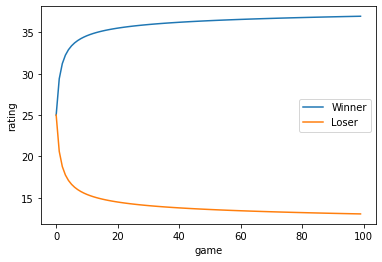

In [42]:
fig, ax = plt.subplots()
ax.plot(r1s, label='Winner')
ax.plot(r2s, label='Loser')
ax.set_xlabel('game')
ax.set_ylabel('rating')
ax.legend(loc='best')

# Free-for-all, same placing

In [57]:
r1 = (ts.Rating(),)
r2 = (ts.Rating(),)
r3 = (ts.Rating(),)
r4 = (ts.Rating(),)
r1, r2, r3, r4

((trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),))

In [58]:
N = 100
r1s = np.empty(N)
r2s = np.empty(N)
r3s = np.empty(N)
r4s = np.empty(N)
for i in range(N):
    r1s[i] = r1[0].mu
    r2s[i] = r2[0].mu
    r3s[i] = r3[0].mu
    r4s[i] = r4[0].mu
    r1, r2, r3, r4 = ts.rate([r1, r2, r3, r4])

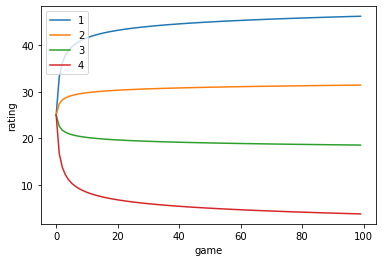

In [60]:
fig, ax = plt.subplots()
ax.plot(r1s, label='1')
ax.plot(r2s, label='2')
ax.plot(r3s, label='3')
ax.plot(r4s, label='4')
ax.set_xlabel('game')
ax.set_ylabel('rating')
ax.legend(loc='best')

# Free-for-all, random placing

In [85]:
import random

In [86]:
r1 = (ts.Rating(),)
r2 = (ts.Rating(),)
r3 = (ts.Rating(),)
r4 = (ts.Rating(),)
r1, r2, r3, r4

((trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),))

In [87]:
N = 100
r1s = np.empty(N)
r2s = np.empty(N)
r3s = np.empty(N)
r4s = np.empty(N)
for i in range(N):
    r1s[i] = r1[0].mu
    r2s[i] = r2[0].mu
    r3s[i] = r3[0].mu
    r4s[i] = r4[0].mu
    placing = [r1, r2, r3, r4]
    random.shuffle(placing)
    r1, r2, r3, r4 = ts.rate(placing)

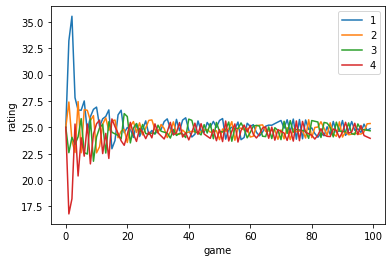

In [88]:
fig, ax = plt.subplots()
ax.plot(r1s, label='1')
ax.plot(r2s, label='2')
ax.plot(r3s, label='3')
ax.plot(r4s, label='4')
ax.set_xlabel('game')
ax.set_ylabel('rating')
ax.legend(loc='best')

# Custom environment

In [103]:
env = ts.TrueSkill(draw_probability=0)

In [108]:
env.beta

4.166666666666667

In [104]:
r1 = (env.create_rating(),)
r2 = (env.create_rating(),)
r3 = (env.create_rating(),)
r4 = (env.create_rating(),)
r1, r2, r3, r4

((trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),))

In [105]:
N = 100
r1s = np.empty(N)
r2s = np.empty(N)
r3s = np.empty(N)
r4s = np.empty(N)
for i in range(N):
    r1s[i] = r1[0].mu
    r2s[i] = r2[0].mu
    r3s[i] = r3[0].mu
    r4s[i] = r4[0].mu
    placing = [r1, r2, r3, r4]
    random.shuffle(placing)
    r1, r2, r3, r4 = ts.rate(placing)

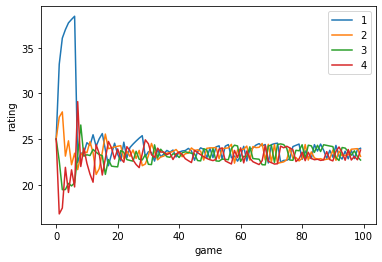

In [106]:
fig, ax = plt.subplots()
ax.plot(r1s, label='1')
ax.plot(r2s, label='2')
ax.plot(r3s, label='3')
ax.plot(r4s, label='4')
ax.set_xlabel('game')
ax.set_ylabel('rating')
ax.legend(loc='best')

# Win probability, from docs

In [114]:
def win_probability(a, b):                                                      
    deltaMu = sum([x.mu for x in a]) - sum([x.mu for x in b])                   
    sumSigma = sum([x.sigma ** 2 for x in a]) + sum([x.sigma ** 2 for x in b])  
    playerCount = len(a) + len(b)                                               
    denominator = np.sqrt(playerCount * (env.beta * env.beta) + sumSigma)             
    return env.cdf(deltaMu / denominator)  

In [125]:
win_probability((env.create_rating(30),), (env.create_rating(25),))

0.6478317969284113

## Extension to 3 players
https://github.com/sublee/trueskill/issues/35

In [154]:
env = ts.TrueSkill(draw_probability=0)

In [150]:
a = (env.create_rating(20),)
b = (env.create_rating(25),)
c = (env.create_rating(30),)

In [156]:
# Pairwise comparisons:
# P (a beats b)
win_probability(a, b)

0.35216820307158875

In [157]:
# P (b beats c)
win_probability(b, c)

0.35216820307158875

In [161]:
# P (a beats c)
win_probability(a, c)

0.22394222940798758

In [ ]:
# P(abc) = P (ab | bc) * P(bc)


# Apply it to a race

In [163]:
import pandas as pd
import dill
import re

from preprocess import clean

In [172]:
file = r'C:\data\results\races\1000.pkd'
json = dill.load(open(file, 'rb'))
df_race = pd.read_json(json)
race_id = re.findall('(\d+)', file)[0]
df_race['race_id'] = int(race_id)

In [173]:
df = clean(df_race)

In [174]:
df.head()

,Place,RaceTime,Name,Age,Category,RacerID,TeamID,TeamName,RaceName,RaceCategoryName,IsDQ
0,1.0,,Luke Demoe,NaN,NaN,12069,13113,SLOCUM Race Team,Swan Island Rose Festival Criterium,Category 3,False
1,2.0,,Joe Dengel,NaN,NaN,14499,3257,NaN,Swan Island Rose Festival Criterium,Category 3,False
2,3.0,,Daniel Penner,25.0,3.0,14953,4627,Ironclad Performance Wear,Swan Island Rose Festival Criterium,Category 3,False
3,4.0,,Chris Ward,NaN,NaN,10755,4513,Guinness Cycling Team,Swan Island Rose Festival Criterium,Category 3,False
4,5.0,,Brian Engelhard,36.0,2.0,11409,4647,bicycleattorney.com,Swan Island Rose Festival Criterium,Category 3,False


In [344]:
import trueskill as ts
import pandas as pd
import matplotlib.pyplot as plt

In [358]:
ratings = {}
ratings.update({racer_id: ts.Rating() for racer_id in df['RacerID']})

In [359]:
def update_ratings(df, ratings):
    df = df[~df['Place'].isna()]
    placing = df['Place']
    if not (placing.sort_values() == placing).all():
        raise Exception('Placing not in order!')
    new_ratings = ts.rate([(ratings[racer_id],) for racer_id in df['RacerID']])
    ratings.update({racer_id: new_ratings[i][0] for i, racer_id in enumerate(df['RacerID'])})
    print(ratings[25978])

In [360]:
df.groupby('RaceCategoryName').apply(lambda x: update_ratings(x, ratings))

trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=25.000, sigma=8.333)
trueskill.Rating(mu=40.962, sigma=5.227)


""


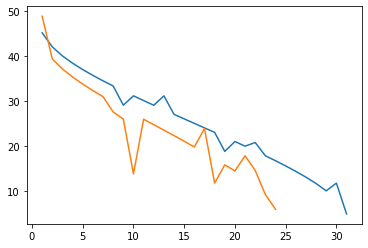

In [378]:
grouped = df.groupby('RaceCategoryName')


fig, ax = plt.subplots()

for name, group in grouped:
    if name not in ('Category 3', 'Category 4', 'Masters Cat 4/5'):
        continue
    placing = group['Place']
    names = group['Name']
    ids = group['RacerID'].values
    ratings_by_group = [ratings[racer_id].mu for racer_id in ids]
#     print(ratings_by_group)
    ax.plot(placing, ratings_by_group)

In [380]:
placing, names, ids, ratings_by_group

(102     1.0
 103     2.0
 104     3.0
 105     4.0
 106     5.0
 107     6.0
 108     7.0
 109     8.0
 110     9.0
 111    10.0
 112    11.0
 113    12.0
 114    13.0
 115    14.0
 116    15.0
 117    16.0
 118    17.0
 119    18.0
 120    19.0
 121    20.0
 122    21.0
 123    22.0
 124    23.0
 125    24.0
 Name: Place, dtype: float64,
 102       Stephen Kocher
 103      Jonathan Nelson
 104        Brion Barnett
 105      William Mcbride
 106         John Prosser
 107          Jeff Vinson
 108    Kevin Billingsley
 109        Richard Rosko
 110     David Thielen ii
 111        Eric Anderson
 112          Peter Casey
 113          Wayne Boyle
 114       Steve Thompson
 115            Jim Stuck
 116          Ben Needham
 117          John Porter
 118       Michael Lehman
 119           Marc Riera
 120           Mike Osier
 121       Fergus Kinnell
 122          Kevin Short
 123       Timothy Miller
 124       Jonathan Modie
 125        Chris O'neill
 Name: Name, dtype: object,
 array

In [382]:
df['Name'][df['RacerID'] == 6335]

111    Eric Anderson
172    Eric Anderson
Name: Name, dtype: object

In [383]:
df['Place'][df['RacerID']==6335]

111    10.0
172    47.0
Name: Place, dtype: float64

Eric Anderson placed last in one race, so his score suffered because of it! Should we just consider the best result from a given day?

# Try Microsoft example
https://www.microsoft.com/en-us/research/project/trueskill-ranking-system/

In [3]:
ratings = [(ts.Rating(),) for i in range(8)]
ratings

[(trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),)]

In [6]:
new_ratings = ts.rate(ratings)
new_ratings

[(trueskill.Rating(mu=36.771, sigma=5.749),),
 (trueskill.Rating(mu=32.242, sigma=5.133),),
 (trueskill.Rating(mu=29.074, sigma=4.943),),
 (trueskill.Rating(mu=26.322, sigma=4.875),),
 (trueskill.Rating(mu=23.678, sigma=4.875),),
 (trueskill.Rating(mu=20.926, sigma=4.943),),
 (trueskill.Rating(mu=17.758, sigma=5.133),),
 (trueskill.Rating(mu=13.229, sigma=5.749),)]

# Make some plots

In [1]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import trueskill as ts

In [2]:
WINDOW = 30

In [3]:
env = ts.TrueSkill(backend='scipy', draw_probability=0)

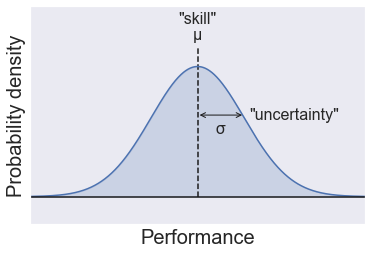

In [4]:
fig, ax = plt.subplots()

r = env.Rating()
xmin, xmax = r.mu - 4 * r.sigma, r.mu + 4 * r.sigma
x = np.linspace(xmin, xmax, 1000)
y = env.pdf(x, loc=r.mu, scale=r.sigma)
ax.plot(x, y, 'C0')
ax.fill_between(x, 0, y, color='C0', alpha=0.2)
ax.set_xlabel('Performance', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim(r.mu - WINDOW, r.mu + WINDOW)
ax.set_ylim(-.01, .07)
ax.axhline(0, color='k')
ax.vlines(r.mu, 0, .055, ls='--', color='k')
ax.text(r.mu, 0.064, '"skill"', ha='center', fontsize=16)
ax.text(r.mu, 0.058, 'μ', ha='center', fontsize=16)

a = 0.03
ax.annotate('', (r.mu, a), (r.mu + r.sigma, a), color='k',
            arrowprops=dict(lw=1, arrowstyle="<->", color='k'))
ax.text(r.mu + r.sigma + 1, a, '"uncertainty"', ha='left', va='center', fontsize=16)
ax.text(r.mu + r.sigma / 2, a-.005, 'σ', ha='center', va='center', fontsize=16)

fig.savefig('static/plots/normal.png', bbox_inches='tight')

## 2 racers

In [5]:
ratings = [env.Rating() for i in range(2)]

In [6]:
ratings = [rating[0] for rating in env.rate([(r,) for r in ratings])]

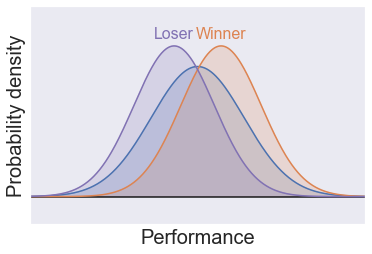

In [7]:
fig, ax = plt.subplots()

r0 = env.Rating()
xmin, xmax = r0.mu - 8 * r0.sigma, r0.mu + 8 * r0.sigma
x = np.linspace(xmin, xmax, 1000)
y0 = env.pdf(x, loc=r0.mu, scale=r0.sigma)
ax.plot(x, y0, 'C0')
ax.fill_between(x, 0, y0, color='C0', alpha=0.2)
ax.set_xlabel('Performance', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim(r0.mu - WINDOW, r0.mu + WINDOW)
ax.set_ylim(-.01, .07)
ax.axhline(0, color='k')


colors = ['C1', 'C4']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
ax.text(ratings[0].mu, .06, 'Winner', ha='center', va='center', fontsize=16, color=colors[0])    
ax.text(ratings[1].mu, .06, 'Loser', ha='center', va='center', fontsize=16, color=colors[1])    
    
# ax.annotate('', (r0.mu, y0.max()), (ratings[0].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
# ax.annotate('', (r0.mu, y0.max()), (ratings[1].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
    
fig.savefig('static/plots/2racers.png', bbox_inches='tight')

## race then race again

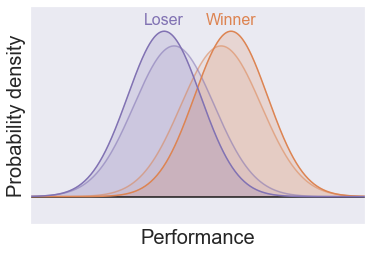

In [13]:
ratings = [env.Rating() for i in range(2)]
ratings = [rating[0] for rating in env.rate([(r,) for r in ratings])]

fig, ax = plt.subplots()

r0 = env.Rating()
xmin, xmax = r0.mu - 8 * r0.sigma, r0.mu + 8 * r0.sigma
x = np.linspace(xmin, xmax, 1000)

colors = ['C1', 'C4']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c, alpha=0.5)
    ax.fill_between(x, 0, y, color=c, alpha=0.1)

ax.set_xlabel('Performance', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim(r0.mu - WINDOW, r0.mu + WINDOW)
ax.set_ylim(-.01, .07)
ax.axhline(0, color='k')

ratings = [rating[0] for rating in env.rate([(r,) for r in ratings])]

colors = ['C1', 'C4']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
ax.text(ratings[0].mu, .065, 'Winner', ha='center', va='center', fontsize=16, color=colors[0])    
ax.text(ratings[1].mu, .065, 'Loser', ha='center', va='center', fontsize=16, color=colors[1])    
    
# ax.annotate('', (r0.mu, y0.max()), (ratings[0].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
# ax.annotate('', (r0.mu, y0.max()), (ratings[1].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
    
fig.savefig('static/plots/2racers2.png', bbox_inches='tight')

# 2 different racers

### better racer less variance, wins

In [9]:
ratings = [env.Rating(30, 6), env.Rating(20)]
ratings2 = [rating[0] for rating in env.rate([(r,) for r in ratings])]

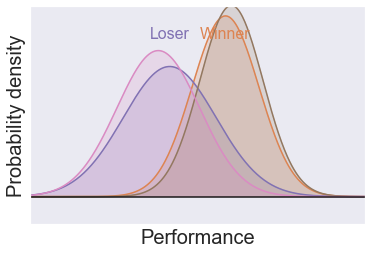

In [10]:
fig, ax = plt.subplots()

r0 = env.Rating()
xmin, xmax = r0.mu - 8 * r0.sigma, r0.mu + 8 * r0.sigma
x = np.linspace(xmin, xmax, 1000)

colors = ['C1', 'C4']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    
colors2= ['C5', 'C6']
for r, c in zip(ratings2, colors2):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    
ax.set_xlabel('Performance', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim(r0.mu - WINDOW, r0.mu + WINDOW)
ax.set_ylim(-.01, .07)
ax.axhline(0, color='k')

ax.text(ratings[0].mu, .06, 'Winner', ha='center', va='center', fontsize=16, color=colors[0])    
ax.text(ratings[1].mu, .06, 'Loser', ha='center', va='center', fontsize=16, color=colors[1])    
    
# ax.annotate('', (r0.mu, y0.max()), (ratings[0].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
# ax.annotate('', (r0.mu, y0.max()), (ratings[1].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
    
fig.savefig('static/plots/2diffracers.png', bbox_inches='tight')

### better racer more variance, wins

In [409]:
ratings = [env.Rating(30), env.Rating(20, 6)]
ratings2 = [rating[0] for rating in env.rate([(r,) for r in ratings])]

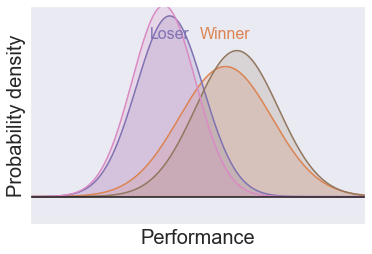

In [410]:
fig, ax = plt.subplots()

r0 = env.Rating()
xmin, xmax = r0.mu - 8 * r0.sigma, r0.mu + 8 * r0.sigma
x = np.linspace(xmin, xmax, 1000)

colors = ['C1', 'C4']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    
colors2= ['C5', 'C6']
for r, c in zip(ratings2, colors2):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    
ax.set_xlabel('Performance', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim(r0.mu - WINDOW, r0.mu + WINDOW)
ax.set_ylim(-.01, .07)
ax.axhline(0, color='k')

ax.text(ratings[0].mu, .06, 'Winner', ha='center', va='center', fontsize=16, color=colors[0])    
ax.text(ratings[1].mu, .06, 'Loser', ha='center', va='center', fontsize=16, color=colors[1])    
    
# ax.annotate('', (r0.mu, y0.max()), (ratings[0].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
# ax.annotate('', (r0.mu, y0.max()), (ratings[1].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
    
fig.savefig('static/plots/2diffracers.png', bbox_inches='tight')

### better racer less variance, loses

In [411]:
ratings = [env.Rating(20), env.Rating(30, 6)]
ratings2 = [rating[0] for rating in env.rate([(r,) for r in ratings])]

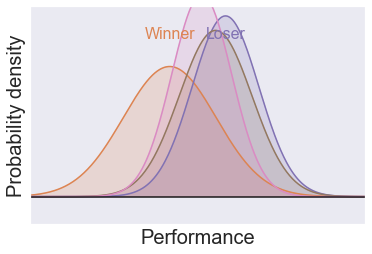

In [412]:
fig, ax = plt.subplots()

r0 = env.Rating()
xmin, xmax = r0.mu - 8 * r0.sigma, r0.mu + 8 * r0.sigma
x = np.linspace(xmin, xmax, 1000)

colors = ['C1', 'C4']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    
colors2= ['C5', 'C6']
for r, c in zip(ratings2, colors2):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    
ax.set_xlabel('Performance', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim(r0.mu - WINDOW, r0.mu + WINDOW)
ax.set_ylim(-.01, .07)
ax.axhline(0, color='k')

ax.text(ratings[0].mu, .06, 'Winner', ha='center', va='center', fontsize=16, color=colors[0])    
ax.text(ratings[1].mu, .06, 'Loser', ha='center', va='center', fontsize=16, color=colors[1])    
    
# ax.annotate('', (r0.mu, y0.max()), (ratings[0].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
# ax.annotate('', (r0.mu, y0.max()), (ratings[1].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
    
fig.savefig('static/plots/2diffracers.png', bbox_inches='tight')

### better racer more variance, loses

In [413]:
ratings = [env.Rating(20, 6), env.Rating(30)]
ratings2 = [rating[0] for rating in env.rate([(r,) for r in ratings])]

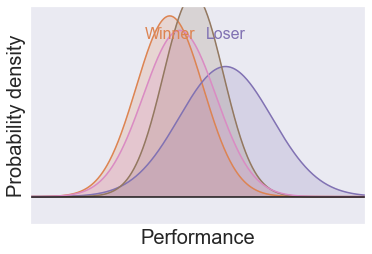

In [414]:
fig, ax = plt.subplots()

r0 = env.Rating()
xmin, xmax = r0.mu - 8 * r0.sigma, r0.mu + 8 * r0.sigma
x = np.linspace(xmin, xmax, 1000)

colors = ['C1', 'C4']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    
colors2= ['C5', 'C6']
for r, c in zip(ratings2, colors2):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    
ax.set_xlabel('Performance', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim(r0.mu - WINDOW, r0.mu + WINDOW)
ax.set_ylim(-.01, .07)
ax.axhline(0, color='k')

ax.text(ratings[0].mu, .06, 'Winner', ha='center', va='center', fontsize=16, color=colors[0])    
ax.text(ratings[1].mu, .06, 'Loser', ha='center', va='center', fontsize=16, color=colors[1])    
    
# ax.annotate('', (r0.mu, y0.max()), (ratings[0].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
# ax.annotate('', (r0.mu, y0.max()), (ratings[1].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
    
fig.savefig('static/plots/2diffracers.png', bbox_inches='tight')

# 3 racers

In [11]:
env.mu, env.sigma

(25.0, 8.333333333333334)

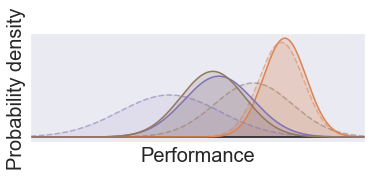

In [43]:
ratings = [env.Rating(40, 4), env.Rating(20, 9), env.Rating(35, 7)]

fig, ax = plt.subplots(figsize=(6,2))

r0 = env.Rating()
xmin, xmax = r0.mu - 8 * r0.sigma, r0.mu + 8 * r0.sigma
x = np.linspace(xmin, xmax, 1000)

colors = ['C1', 'C4', 'C5']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c, alpha=0.5, ls='--')
    ax.fill_between(x, 0, y, color=c, alpha=0.1)

ax.set_xlabel('Performance', fontsize=20)
ax.set_ylabel('Probability density', fontsize=20)
ax.set_yticks([])
ax.set_xticks([])

ax.set_xlim(r0.mu - WINDOW, r0.mu + WINDOW)
# ax.set_ylim(-.01, .07)
ax.axhline(0, color='k')

ratings = [rating[0] for rating in env.rate([(r,) for r in ratings])]

colors = ['C1', 'C4', 'C5']
for r, c in zip(ratings, colors):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
# ax.text(ratings[0].mu, .065, 'Winner', ha='center', va='center', fontsize=16, color=colors[0])    
# ax.text(ratings[1].mu, .065, 'Loser', ha='center', va='center', fontsize=16, color=colors[1])    
    
# ax.annotate('', (r0.mu, y0.max()), (ratings[0].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
# ax.annotate('', (r0.mu, y0.max()), (ratings[1].mu, y.max()), color='k',
#              arrowprops=dict(lw=1, arrowstyle="<-", color='k'))
    
fig.savefig('static/plots/3racers.png', bbox_inches='tight')

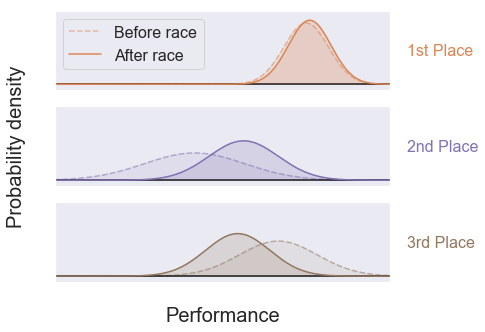

In [76]:
ratings = [env.Rating(40, 4), env.Rating(20, 9), env.Rating(35, 7)]

fig, axes = plt.subplots(nrows=3, figsize=(6,5))
ax0 = fig.add_subplot(111, frameon=False)
ax0.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax0.grid(False)

r0 = env.Rating()
xmin, xmax = r0.mu - 8 * r0.sigma, r0.mu + 8 * r0.sigma
x = np.linspace(xmin, xmax, 1000)

colors = ['C1', 'C4', 'C5']
labels = ['Before race', None, None]
for ax, r, c, label in zip(axes, ratings, colors, labels):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c, alpha=0.5, ls='--', label=label)
    ax.fill_between(x, 0, y, color=c, alpha=0.1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axhline(0, color='k')
    ax.set_xlim(r0.mu - WINDOW, r0.mu + WINDOW)    
    
ax0.set_xlabel('Performance', fontsize=20)
ax0.set_ylabel('Probability density', fontsize=20)


ratings = [rating[0] for rating in env.rate([(r,) for r in ratings])]

colors = ['C1', 'C4', 'C5']
labels = ['After race', None, None]
places = ['1st Place', '2nd Place', '3rd Place']
for ax, r, c, label, place in zip(axes, ratings, colors, labels, places):
    y = env.pdf(x, loc=r.mu, scale=r.sigma)
    ax.plot(x, y, c, label=label)
    ax.fill_between(x, 0, y, color=c, alpha=0.2)
    ax.set_ylim(-.01, .12)

    # place labels
    ax.text(1.05, 0.5, place, transform=ax.transAxes, va='center', fontsize=16, color=c)
    
    
axes[0].legend(loc='best', fontsize=16)

    
fig.savefig('static/plots/3racers.png', bbox_inches='tight')

# WIth data

In [4]:
import pandas as pd
import dill

In [7]:
file = r"C:\data\results\races\11982.pkd"
json = dill.load(open(file, 'rb'))
df = pd.read_json(json)

In [10]:
import sys
sys.path.append('..')
from preprocess import clean
df = clean(df)

In [13]:
df2 = df.query("RaceCategoryName == 'Men Cat 1/2/3'")

In [15]:
df2['RacerID']

0      93913
1      48769
2     133404
3     120033
4      96855
5      61430
6      62948
7     134785
8     103599
9      29060
10    133401
11    133436
12     93915
13    133403
14     61483
15     64125
16    167520
17    101085
18      6270
19     60006
20     60408
21    123604
22     70203
23    149270
24     89057
25     61487
26     50636
27     61319
28      6768
29     67760
30    162818
31     60074
32     88389
33    177008
34     61478
35    170280
36    117075
37     16128
38    131532
39     61464
Name: RacerID, dtype: int64